In [175]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_uci.csv


# Importing Data 

In [176]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# EDA

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [178]:
df.shape

(920, 16)

In [179]:
print('The precentage of missing values: \n', (df.isna().sum() / len(df)*100))

The precentage of missing values: 
 id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


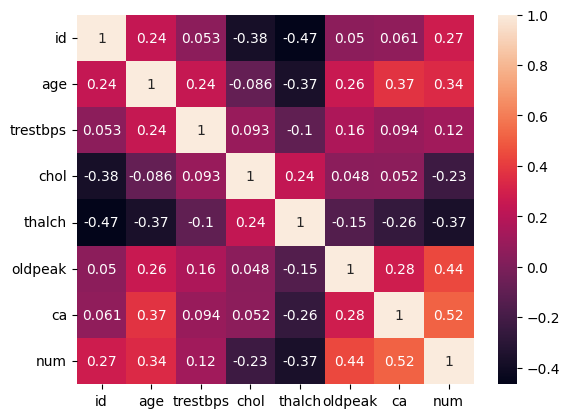

In [180]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

## ID

In [181]:
df['id'].nunique()

920

## Age

In [182]:
print('The Mode of Age is: ', df['age'].mode()[0])
print('The Avg. of Age is: ', df['age'].mean().round(2))
print('The Median of Age is: ', df['age'].median())

The Mode of Age is:  54
The Avg. of Age is:  53.51
The Median of Age is:  54.0


In [183]:
print('The Min Age is: ',df['age'].min())
print('The Min Age is: ',df['age'].max())

The Min Age is:  28
The Min Age is:  77


In [184]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

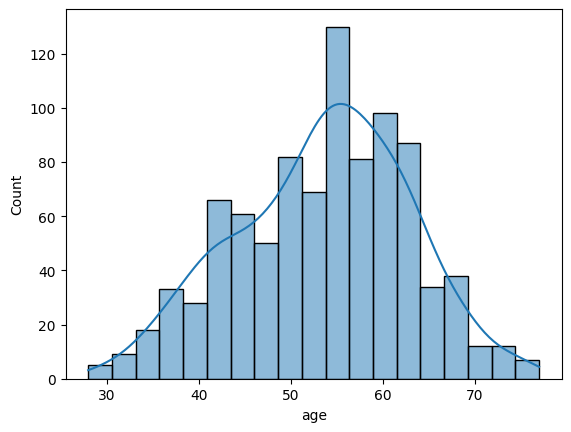

In [185]:
sns.histplot(x='age', kde=True,data=df)
plt.show()

## Sex

In [186]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [187]:
male_counts = df['sex'].value_counts()[0]
female_counts = df['sex'].value_counts()[1]

total_counts = male_counts + female_counts


male_prec = round(male_counts / total_counts * 100, 1)
female_prec = round(female_counts / total_counts * 100, 1)


print(f'The Male Precentage is: {male_prec}%')
print(f'The Female Precentage is: {female_prec}%')

The Male Precentage is: 78.9%
The Female Precentage is: 21.1%


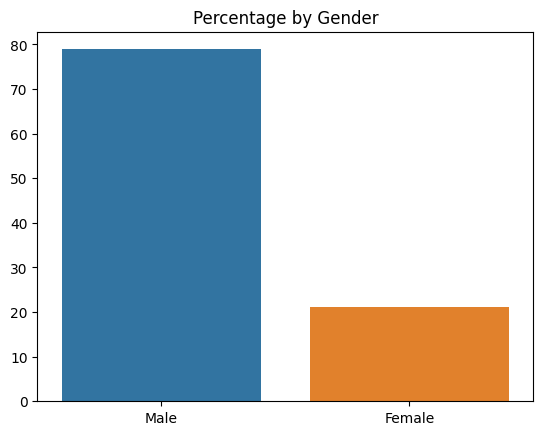

In [188]:
sns.barplot(x=['Male', 'Female'], y=[male_prec, female_prec])
plt.title('Percentage by Gender')
plt.show()

## Dataset

In [189]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

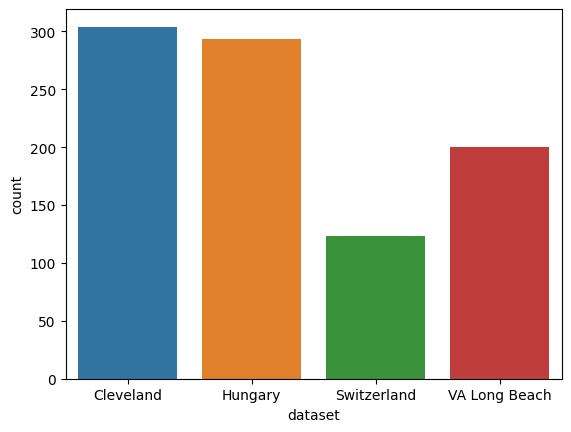

In [190]:
sns.countplot(x='dataset', data=df)
plt.show()

In [191]:
df.groupby('dataset')['sex'].value_counts()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64

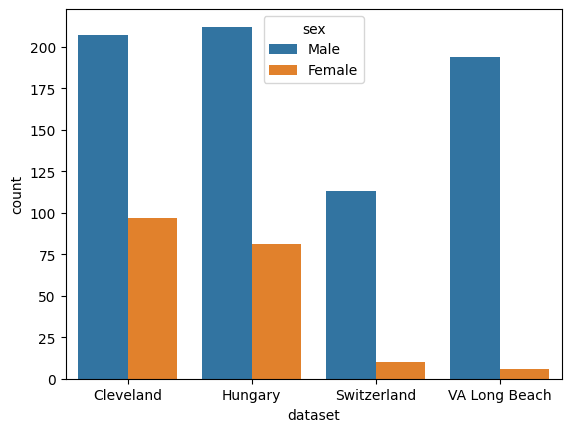

In [192]:
sns.countplot(x='dataset', data=df, hue='sex')
plt.show()

In [193]:
df.groupby('dataset')['age'].mean()

dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64

## CP (Chest Pain)

In [195]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [196]:
df.groupby('cp')['age'].value_counts().sort_values(ascending=False)

cp              age
asymptomatic    57     27
                58     23
                54     22
                59     22
                60     22
                       ..
non-anginal     35      1
                70      1
                73      1
typical angina  30      1
                74      1
Name: count, Length: 156, dtype: int64

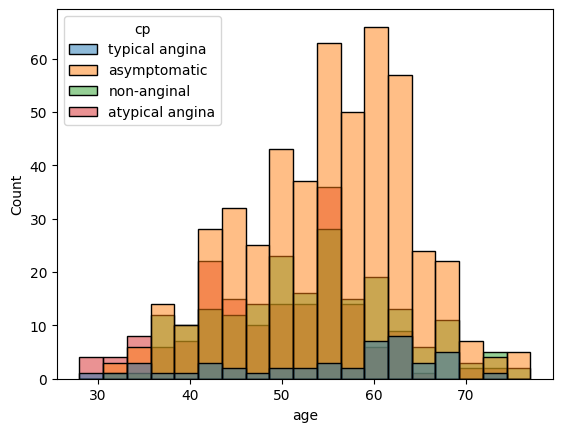

In [197]:
sns.histplot(x='age', hue='cp', data=df)
plt.show()

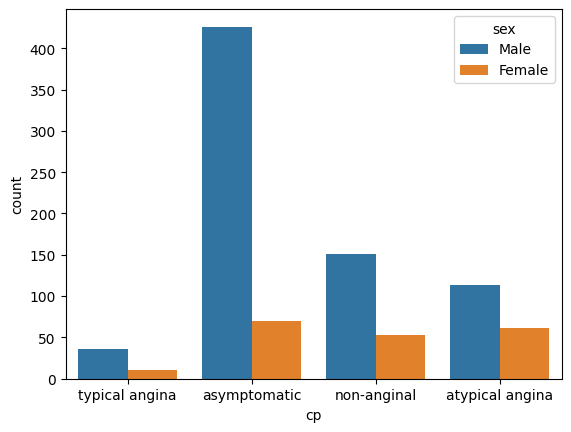

In [198]:
sns.countplot(df, x='cp', hue='sex')
plt.show()

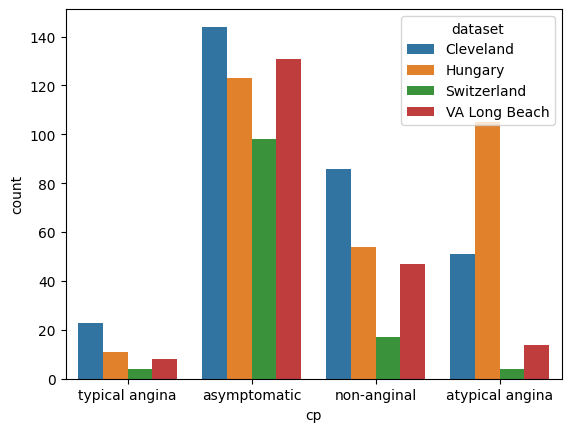

In [199]:
sns.countplot(df, x='cp', hue='dataset')
plt.show()

## Trestbps (resting blood pressure)

(in mm Hg on admission to the hospital)

In [201]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [202]:
print(df['trestbps'].mode()[0])
print(df['trestbps'].median())

120.0
130.0


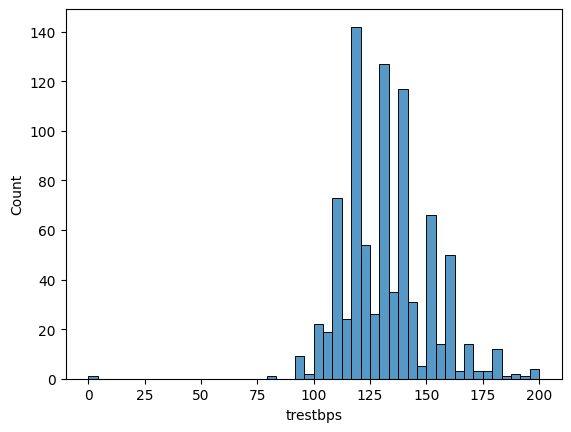

In [203]:
sns.histplot(df, x='trestbps')
plt.show()

In [204]:
df['trestbps'].isnull().sum()

59

## Chol (serum cholesterol in mg/dl)

In [205]:
df['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [206]:
print(df['chol'].mode()[0])
print(df['chol'].median())

0.0
223.0


## Fbs (if fasting blood sugar > 120 mg/dl)

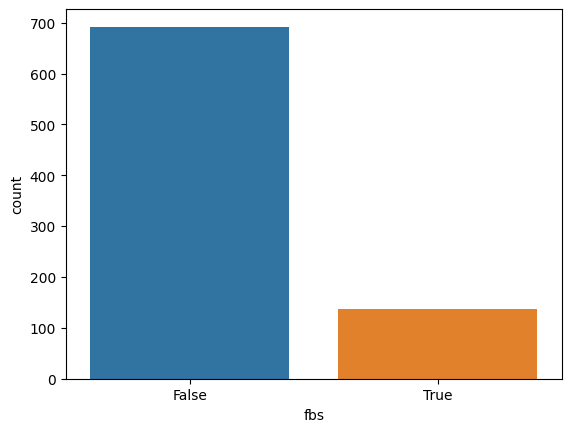

fbs
False    692
True     138
Name: count, dtype: int64


In [208]:
sns.countplot(df, x='fbs')
plt.show()
print(df['fbs'].value_counts())

In [209]:
df['fbs'].isnull().sum()

90

## restecg (resting electrocardiographic results)]

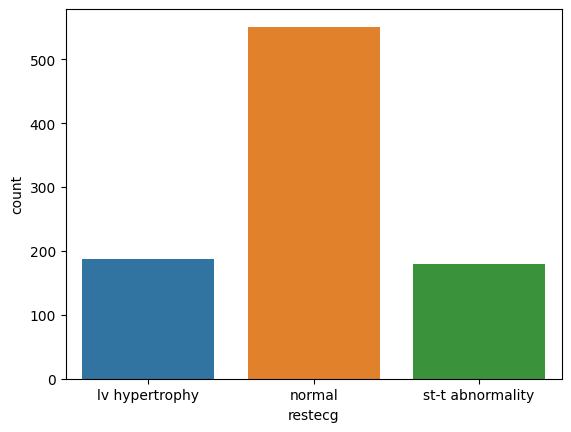

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


In [210]:
sns.countplot(df, x='restecg')
plt.show()
print(df['restecg'].value_counts())

## thalch (maximum heart rate achieved)

In [211]:
df['thalch'].describe()

count    865.000000
mean     137.545665
std       25.926276
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

In [212]:
print(df['thalch'].mode()[0])
print(df['thalch'].median())

150.0
140.0


In [213]:
df.thalch.isna().sum()

55

## exang (exercise-induced angina)

In [214]:
df['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

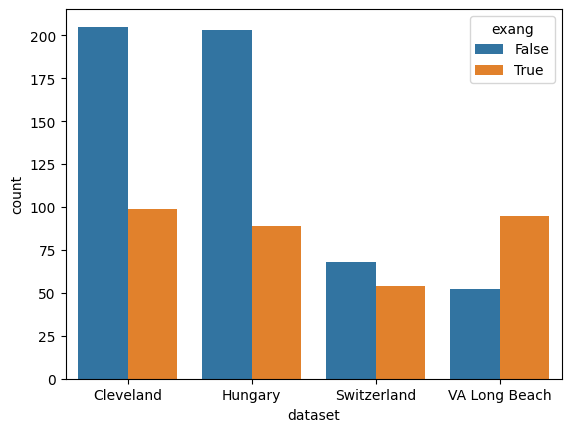

In [215]:
sns.countplot(df, x='dataset', hue='exang')
plt.show()

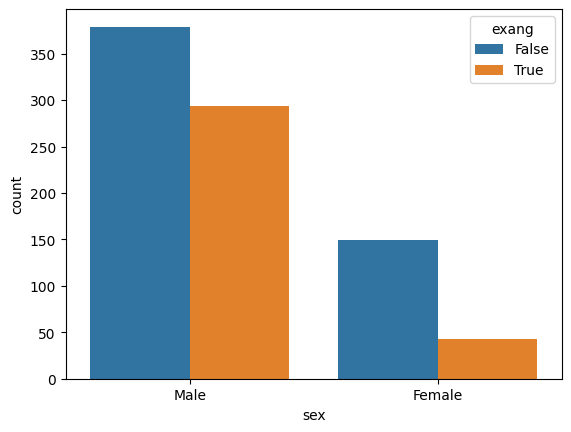

In [216]:
sns.countplot(df, x='sex', hue='exang')
plt.show()

## oldpeak: ST depression induced by exercise relative to rest

In [217]:
df['oldpeak'].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

<Axes: xlabel='oldpeak'>

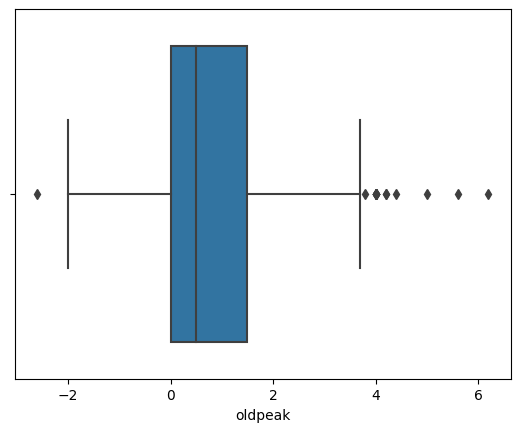

In [218]:
sns.boxplot(df, x='oldpeak')

In [219]:
df.oldpeak.isna().sum()

62

## slope: the slope of the peak exercise ST segment

In [220]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

## ca: number of major vessels (0-3) colored by fluoroscopy

In [221]:
df['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

<Axes: xlabel='ca', ylabel='count'>

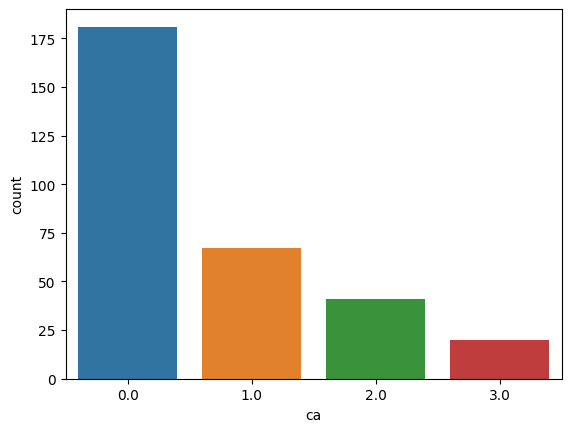

In [222]:
sns.countplot(df, x='ca')

## thal

In [223]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

## num: the predicted attribute

'num' refers to the severity of the heart disease diagnosis
* 0: No heart disease
* 1,2,3,4: Different level of heart disease severity, higher value indicate more severe form

In [224]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [225]:
df.num.describe()

count    920.000000
mean       0.995652
std        1.142693
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64

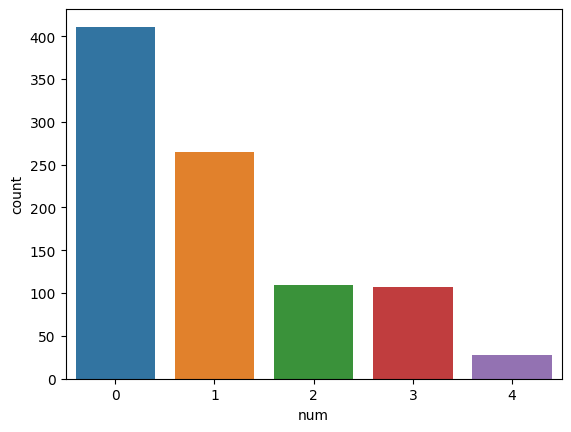

In [226]:
sns.countplot(df, x='num')
plt.show()

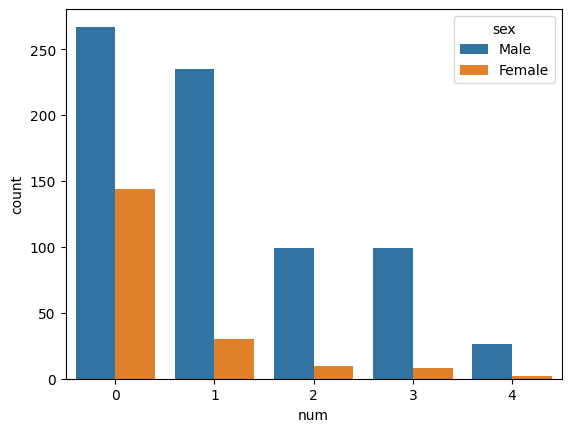

In [227]:
sns.countplot(df, x='num', hue='sex')
plt.show()

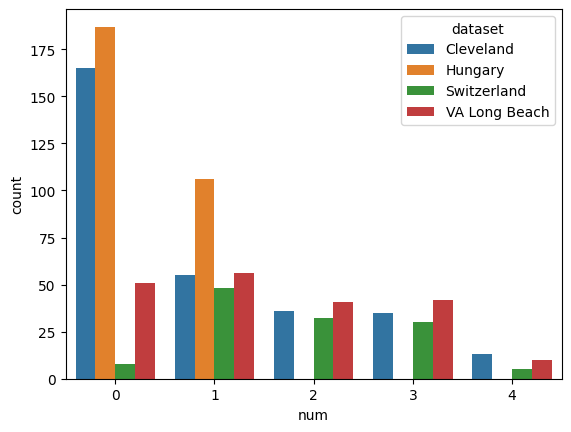

In [228]:
sns.countplot(df, x='num', hue='dataset')
plt.show()

# Missing Values

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [230]:
df_cat = df.select_dtypes(include='object').columns.tolist()
df_numeric = df.select_dtypes(exclude='object').columns.tolist()

In [231]:
df_cat

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [232]:
df_numeric

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

## Impute the Numeric Data

In [233]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = np.nan, strategy ='mean')

df[df_numeric[2:-1]] = impute.fit_transform(df[df_numeric[2:-1]])

In [234]:
df[df_numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   trestbps  920 non-null    float64
 3   chol      920 non-null    float64
 4   thalch    920 non-null    float64
 5   oldpeak   920 non-null    float64
 6   ca        920 non-null    float64
 7   num       920 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 57.6 KB


## Impute the Categorical Data

In [236]:
from sklearn.impute import SimpleImputer

def cat_impute_encode(df, col_name):
    # Check if the column is of a categorical type
    if df[col_name].dtype == 'object':
        # For categorical columns, we need to reshape the data for imputation
        col = df[col_name].values.reshape(-1, 1)

        # Impute missing values with the most frequent value
        imputer = SimpleImputer(strategy='most_frequent')
        imputed = imputer.fit_transform(col)

        # One-hot encode the imputed values
        encoded = pd.get_dummies(imputed.flatten(), prefix=col_name).astype('uint8')

        # Drop the original column and concatenate the one-hot encoded columns
        df = pd.concat([df.drop(columns=[col_name]), encoded], axis=1)
    else:
        # If the column is not categorical, no encoding is needed
        print('Error')
        
    return df

In [237]:
for col in df_cat:
    df = cat_impute_encode(df, col)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   thalch                    920 non-null    float64
 5   oldpeak                   920 non-null    float64
 6   ca                        920 non-null    float64
 7   num                       920 non-null    int64  
 8   sex_Female                920 non-null    uint8  
 9   sex_Male                  920 non-null    uint8  
 10  dataset_Cleveland         920 non-null    uint8  
 11  dataset_Hungary           920 non-null    uint8  
 12  dataset_Switzerland       920 non-null    uint8  
 13  dataset_VA Long Beach     920 non-null    uint8  
 14  cp_asympto

## Data Spliting

In [245]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['id','num'], axis=1) 
y = df['num']

X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Machine Learning

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Random Forest': RandomForestClassifier(random_state=2),
    'Logistic Regression': LogisticRegression(random_state=2),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=2),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Gradient Bossting Classifier': GradientBoostingClassifier(random_state=2),
}

In [251]:
from sklearn.metrics import accuracy_score

results = []
for model_name, model in models.items():
    #print(f'Training {model_name}...')
    
    try:
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        
        results.append((model_name, acc))

        print(f'{model_name} Accuracy: {acc:.4f}')
    except Exception as e:
        print(f'Error training {model_name}: {e}')

Random Forest Accuracy: 0.5471
Logistic Regression Accuracy: 0.5797
Decision Tree Classifier Accuracy: 0.5000
K Neighbors Classifier Accuracy: 0.4565
Gradient Bossting Classifier Accuracy: 0.5616


In [255]:
best_model_name, best_model_score = max(results, key=lambda x: x[1])
best_model_name, best_model_score

('Logistic Regression', 0.5797101449275363)

# Hyper Parameter Tuning 

## Logistic Regression

In [262]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'C': [100, 500, 1000],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    'max_iter': [500, 700, 1000] 
}

grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

CPU times: user 7min 1s, sys: 668 ms, total: 7min 1s
Wall time: 7min 2s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 500, 1000], 'max_iter': [500, 700, 1000],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']},
             scoring='accuracy')

In [266]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.6165455426356589


In [267]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.5471014492753623


## Gradient Boosting Classifier

In [268]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],        # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage
    'max_depth': [3, 5, 7],               # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],      # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4] 
}

grid_search = GridSearchCV(gbr, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

CPU times: user 31min 17s, sys: 209 ms, total: 31min 17s
Wall time: 31min 20s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [269]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.5901162790697675


In [270]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.5652173913043478
